# **Ejemplo de aplicación con Redes Neuronales para el dataset de Iris**

**Descripción del dataset:**

**Objetivo:** El dataset Iris es utilizado para problemas de clasificación. El objetivo es predecir la especie de una flor de iris (clasificación) basada en las medidas de sus características físicas.

**Clases:** Hay tres clases (especies) de flores:

*   Setosa
*   Versicolor
*   Virginica

**Características:** El dataset contiene 150 observaciones, cada una con 4 características (medidas) que describen las flores:

* Largo del sépalo (en cm)
* Ancho del sépalo (en cm)
* Largo del pétalo (en cm)
* Ancho del pétalo (en cm)

**Distribución de las clases:**

* Cada clase tiene 50 ejemplos.
* Las clases Setosa y Versicolor están perfectamente separadas linealmente, mientras que Versicolor y Virginica están algo superpuestas, lo que hace que la clasificación entre estas últimas dos sea más difícil.

Iteration 1, loss = 1.11338452
Iteration 2, loss = 1.10569392
Iteration 3, loss = 1.09805736
Iteration 4, loss = 1.09051295
Iteration 5, loss = 1.08296381
Iteration 6, loss = 1.07539672
Iteration 7, loss = 1.06794236
Iteration 8, loss = 1.06065806
Iteration 9, loss = 1.05345427
Iteration 10, loss = 1.04619666
Iteration 11, loss = 1.03904185
Iteration 12, loss = 1.03193827
Iteration 13, loss = 1.02484568
Iteration 14, loss = 1.01791069
Iteration 15, loss = 1.01104794
Iteration 16, loss = 1.00422229
Iteration 17, loss = 0.99743009
Iteration 18, loss = 0.99064390
Iteration 19, loss = 0.98401949
Iteration 20, loss = 0.97753654
Iteration 21, loss = 0.97104911
Iteration 22, loss = 0.96463177
Iteration 23, loss = 0.95831749
Iteration 24, loss = 0.95222275
Iteration 25, loss = 0.94621615
Iteration 26, loss = 0.94023527
Iteration 27, loss = 0.93427864
Iteration 28, loss = 0.92835139
Iteration 29, loss = 0.92248332
Iteration 30, loss = 0.91665360
Iteration 31, loss = 0.91084817
Iteration 32, los

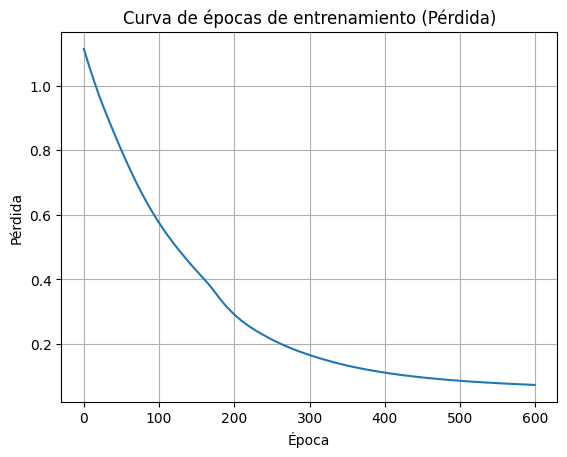

Overall Accuracy (Red Neuronal): 1.0000

Classification Report (Red Neuronal):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



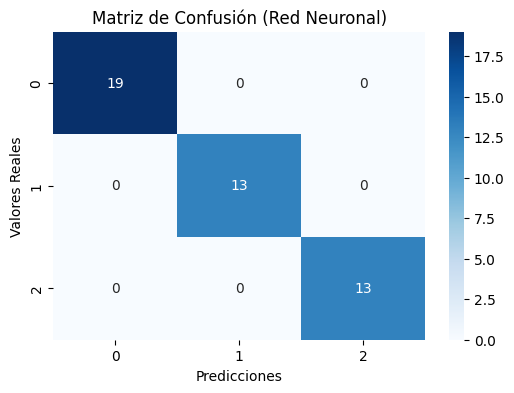

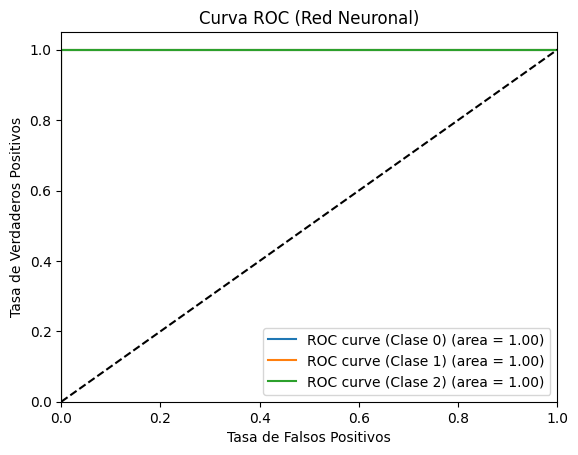

In [ ]:
# Importar librerías
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar el dataset
iris = load_iris()
X = iris.data
y = iris.target

# Normalización de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División del dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Crear el modelo de red neuronal
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42, verbose=True)

# Entrenar la red neuronal
mlp.fit(X_train, y_train)

# Error final después del entrenamiento
final_loss = mlp.loss_
print(f"Error final después del entrenamiento (loss): {final_loss}")

# Configuración interna de la red neuronal
print("\nConfiguración de la red neuronal:")
print(f"Número de capas: {mlp.n_layers_}")
print(f"Neuronas por capa: {mlp.hidden_layer_sizes}")
print(f"Funciones de activación: {mlp.activation}")

# Curva de pérdida durante el entrenamiento
plt.plot(mlp.loss_curve_)
plt.title('Curva de épocas de entrenamiento (Pérdida)')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.grid(True)
plt.show()

# Predicciones
y_pred = mlp.predict(X_test)

# Matriz de confusión y overall accuracy
conf_matrix = confusion_matrix(y_test, y_pred)
overall_accuracy = np.mean(y_test == y_pred)
print(f"Overall Accuracy (Red Neuronal): {overall_accuracy:.4f}")
print("\nClassification Report (Red Neuronal):\n", classification_report(y_test, y_pred))

# Graficar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión (Red Neuronal)')
plt.show()

# Calcular y graficar ROC y AUC para cada clase
fpr = {}
tpr = {}
roc_auc = {}

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test, mlp.predict_proba(X_test)[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar todas las ROC curves
plt.figure()
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (Clase {i}) (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC (Red Neuronal)')
plt.legend(loc="lower right")
plt.show()


# **Taller 6 - Parte 2**

1. Efecto de los porcentajes de muestras de entrenamiento/prueba:

* **Instrucción:** Entrena una red neuronal utilizando diferentes divisiones de datos para entrenamiento y prueba (por ejemplo, 70/30, 80/20, 90/10). Compara los resultados de precisión, matriz de confusión y el tiempo de entrenamiento.

* **Preguntas:**
- ¿Cómo afecta el tamaño del conjunto de entrenamiento a la precisión de la red neuronal?
- ¿Qué relación observas entre el tamaño del conjunto de entrenamiento y el tiempo de cómputo?
- ¿Cuál es la configuración que ofrece un mejor balance entre tiempo y precisión?

2. Variación del número de capas y neuronas:

* **Instrucción:** Realiza pruebas variando el número de capas ocultas y neuronas. Usa al menos tres configuraciones distintas (por ejemplo: (5,5), (10,10), (20,20)).

* **Preguntas:**
- ¿Cómo influye el número de capas ocultas y neuronas en la precisión del modelo?
- ¿Qué configuración logra un mejor desempeño en términos de precisión y tiempo de cómputo?
- ¿Cuál es el impacto del incremento en las neuronas en el tiempo de entrenamiento?

3. Efecto de la función de activación:

* **Instrucción:** Cambia la función de activación de la red neuronal. Prueba al menos tres funciones: relu, tanh, y logistic.

* **Preguntas:**
- ¿Cómo afecta la elección de la función de activación a los resultados de precisión y matriz de confusión?
- ¿Qué función de activación logra un mejor tiempo de convergencia?
- ¿Qué diferencias observas en el comportamiento de la red para cada función de activación en términos de curva de aprendizaje?

4. Evaluación del tiempo de cómputo:

* **Instrucción:** Mide el tiempo de cómputo total para cada una de las configuraciones anteriores (variando porcentajes de entrenamiento/prueba, capas, neuronas, y función de activación).

* **Preguntas:**
- ¿Qué parámetros de la red tienen un mayor impacto en el tiempo de cómputo?
- ¿Cómo se puede mejorar el tiempo de ejecución sin perder demasiada precisión?
- ¿Cuál sería el mejor enfoque para lograr un balance entre precisión y tiempo de cómputo?

